Output()

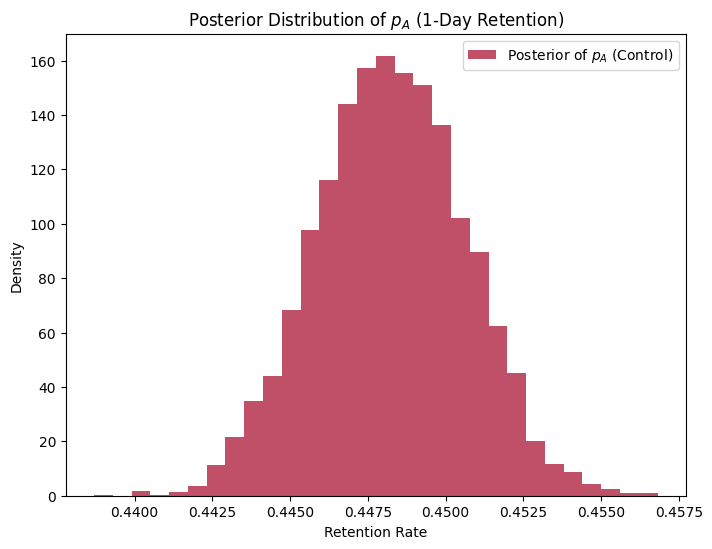

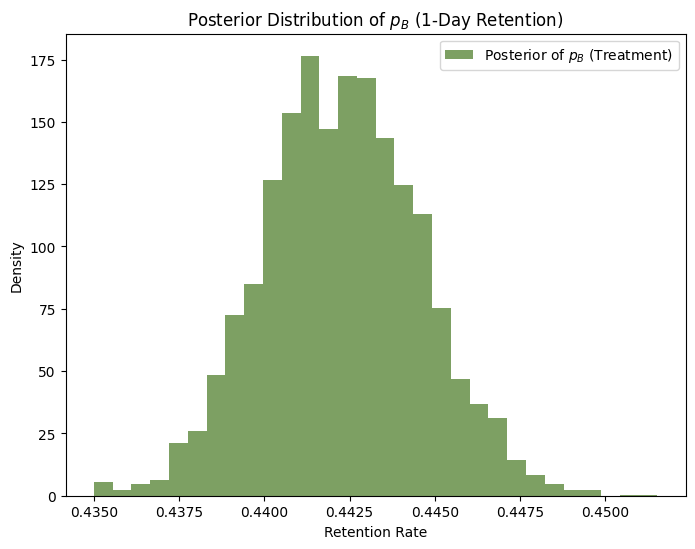

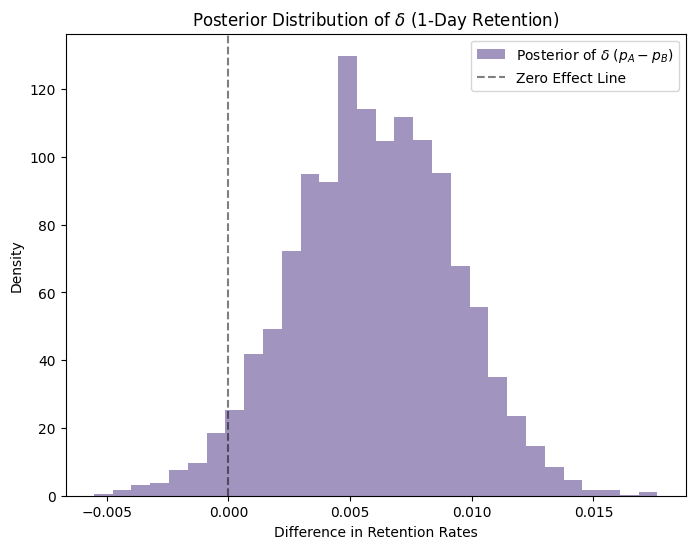

In [1]:
import pandas as pd
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(123)

data = pd.read_csv("https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/cookie_cats.csv")

with pm.Model() as model_1day:
    p_A = pm.Beta("p_A", alpha=1, beta=1)
    p_B = pm.Beta("p_B", alpha=1, beta=1)
    delta = pm.Deterministic("delta", p_A - p_B)

    obs_A = pm.Bernoulli("obs_A", p_A, observed=data.loc[data['version'] == 'gate_30', 'retention_1'])
    obs_B = pm.Bernoulli("obs_B", p_B, observed=data.loc[data['version'] == 'gate_40', 'retention_1'])

    trace_1day = pm.sample(2000, tune=1000, cores=2)

p_A_samples_1day = trace_1day.posterior["p_A"].values.flatten()
p_B_samples_1day = trace_1day.posterior["p_B"].values.flatten()
delta_samples_1day = trace_1day.posterior["delta"].values.flatten()

plt.figure(figsize=(8, 6))
plt.hist(p_A_samples_1day, bins=30, color="#A60628", alpha=0.7, density=True, label="Posterior of $p_A$ (Control)")
plt.title("Posterior Distribution of $p_A$ (1-Day Retention)")
plt.xlabel("Retention Rate")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(p_B_samples_1day, bins=30, color="#467821", alpha=0.7, density=True, label="Posterior of $p_B$ (Treatment)")
plt.title("Posterior Distribution of $p_B$ (1-Day Retention)")
plt.xlabel("Retention Rate")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(delta_samples_1day, bins=30, color="#7A68A6", alpha=0.7, density=True, label="Posterior of $\\delta$ ($p_A - p_B$)")
plt.axvline(0, color="black", linestyle="--", alpha=0.5, label="Zero Effect Line")
plt.title("Posterior Distribution of $\\delta$ (1-Day Retention)")
plt.xlabel("Difference in Retention Rates")
plt.ylabel("Density")
plt.legend()
plt.show()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_A, p_B]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 4694 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


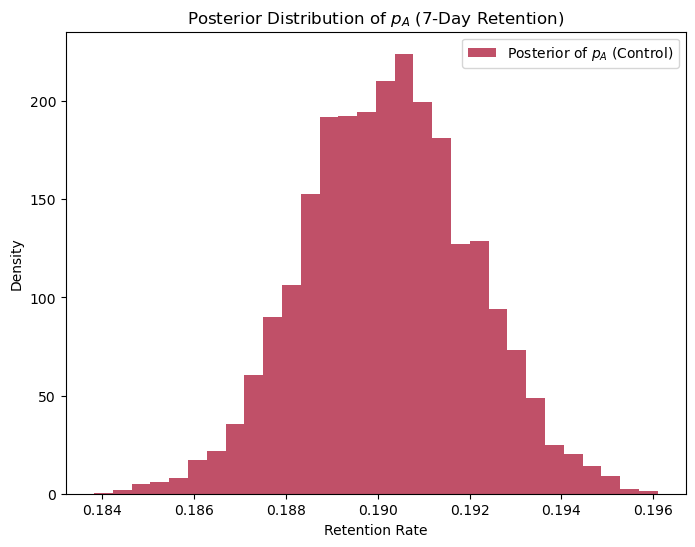

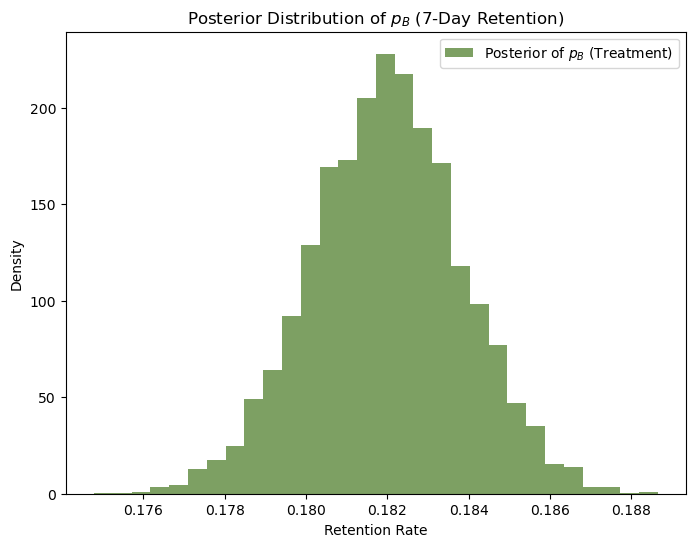

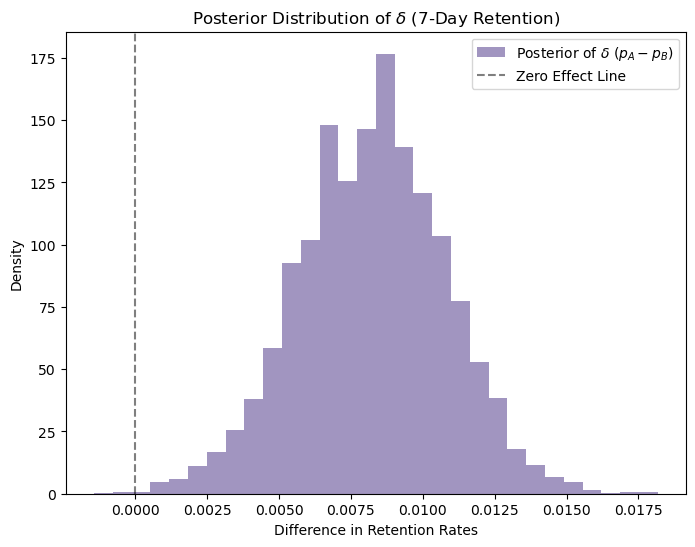

Probability delta > 0 (1-Day Retention): 0.9593
Probability delta > 0 (7-Day Retention): 0.9990


In [ ]:
with pm.Model() as model_7day:
    p_A = pm.Beta("p_A", alpha=1, beta=1)
    p_B = pm.Beta("p_B", alpha=1, beta=1)
    delta = pm.Deterministic("delta", p_A - p_B)

    obs_A = pm.Bernoulli("obs_A", p_A, observed=data.loc[data['version'] == 'gate_30', 'retention_7'])
    obs_B = pm.Bernoulli("obs_B", p_B, observed=data.loc[data['version'] == 'gate_40', 'retention_7'])

    trace_7day = pm.sample(2000, tune=1000, cores=2)

p_A_samples_7day = trace_7day.posterior["p_A"].values.flatten()
p_B_samples_7day = trace_7day.posterior["p_B"].values.flatten()
delta_samples_7day = trace_7day.posterior["delta"].values.flatten()

plt.figure(figsize=(8, 6))
plt.hist(p_A_samples_7day, bins=30, color="#A60628", alpha=0.7, density=True, label="Posterior of $p_A$ (Control)")
plt.title("Posterior Distribution of $p_A$ (7-Day Retention)")
plt.xlabel("Retention Rate")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(p_B_samples_7day, bins=30, color="#467821", alpha=0.7, density=True, label="Posterior of $p_B$ (Treatment)")
plt.title("Posterior Distribution of $p_B$ (7-Day Retention)")
plt.xlabel("Retention Rate")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(delta_samples_7day, bins=30, color="#7A68A6", alpha=0.7, density=True, label="Posterior of $\\delta$ ($p_A - p_B$)")
plt.axvline(0, color="black", linestyle="--", alpha=0.5, label="Zero Effect Line")
plt.title("Posterior Distribution of $\\delta$ (7-Day Retention)")
plt.xlabel("Difference in Retention Rates")
plt.ylabel("Density")
plt.legend()
plt.show()

print(f"Probability delta > 0 (1-Day Retention): {(delta_samples_1day > 0).mean():.4f}")
print(f"Probability delta > 0 (7-Day Retention): {(delta_samples_7day > 0).mean():.4f}")